## Pythonでロジスティック回帰をする

In [41]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


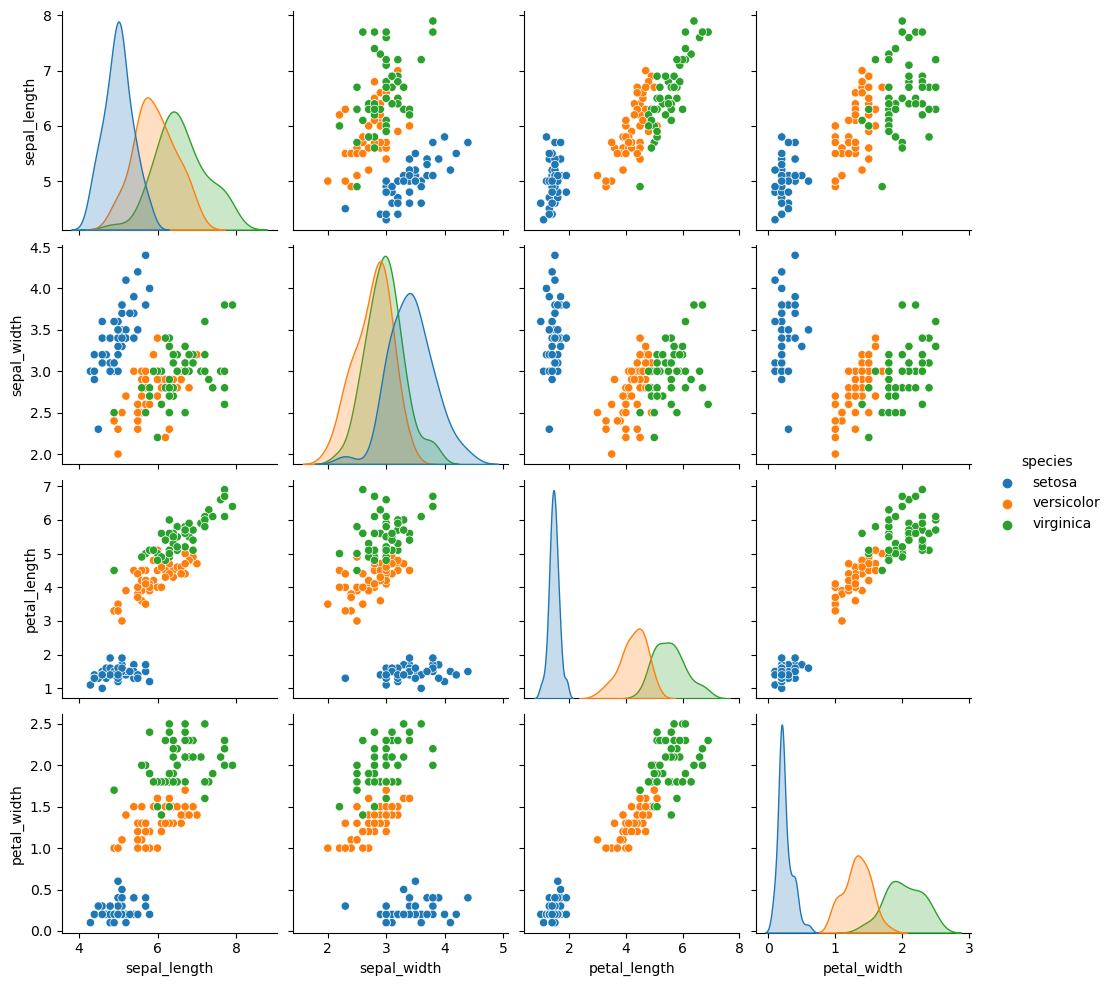

In [42]:
sns.pairplot(df, hue='species')

In [43]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'species']
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(len(X_train), len(X_test))

105 45


In [44]:
from sklearn.linear_model import LogisticRegression

#様々な引数があるので状況で判断
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [45]:
X_test.head()


,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [46]:
model.predict(X_test)

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [47]:
#確率
model.predict_proba(X_test)

array([[0.00000000e+000, 3.17548790e-259, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 2.66320048e-242],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 8.28107497e-194, 1.00000000e+000],
       [1.00000000e+000, 1.68083855e-284, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 6.49393694e-212],
       [0.00000000e+000, 1.00000000e+000, 1.86858156e-178],
       [0.00000000e+000, 1.00000000e+000, 7.06795228e-289],
       [0.00000000e+000, 1.29693797e-181, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 7.76200163e-228],
       [0.00000000e+000, 1.00000000e+000, 5.02731417e-123],
       [0.00000000e+000, 1.00000000e+000, 2.03306141e-161],
       [0.00000000e+000, 1.00000000e+000, 6.45605919e-100],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000

In [48]:
#上記の順番は
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [49]:
print(model.classes_)
print(model.intercept_)
print('--------------')
print(model.feature_names_in_)
print(model.coef_)

['setosa' 'versicolor' 'virginica']
[  80.23761868  129.7912089  -210.02882758]
--------------
['sepal_length' 'sepal_width' 'petal_length' 'petal_width']
[[ 155.59731225  358.73833573 -523.93812876 -248.11592746]
 [ 118.20298638  -15.08081876  -41.54670034  -91.11018672]
 [-273.80029862 -343.65751697  565.4848291   339.22611418]]


## 分類器の評価指標

In [50]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# データロード
df = sns.load_dataset('iris')

#学習データとテストデータ
X = df.loc[:, df.columns != 'species']
y = df['species']

#組み分け
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#モデル
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)

#予測(label)
y_pred = model.predict(X_test)

#混成行列
confusion_matrix(y_test, y_pred)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 10]])

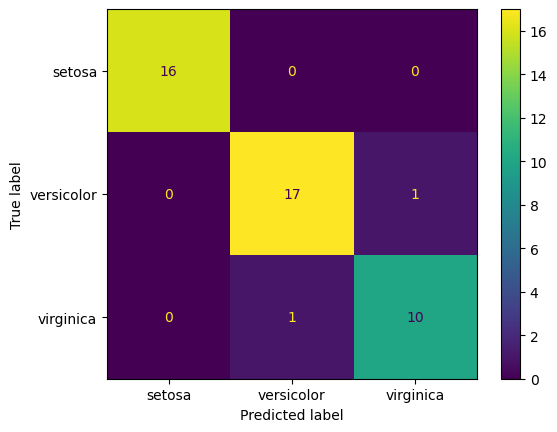

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()


In [57]:
#speificity

import numpy as np
res = []
for c in model.classes_:
    res.append(recall_score(np.array(y_test)!=c, np.array(y_pred)!=c))
res

[1.0, 0.9629629629629629, 0.9705882352941176]

In [59]:
np.mean(res)

0.9778503994190269

## F値とPrecisionとRecallのトレードオフを理解する

In [65]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.9511784511784511

In [67]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [68]:
#kaggleのページからコピペ（前処理）

# 異常値の削除
df = df[df['ca'] < 4] #drop the wrong ca values
df = df[df['thal'] > 0] # drop the wong thal value
 
# カラム名をもっとわかりやすい名前に変換
df = df.rename(columns = {'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure', 'chol': 'cholesterol','fbs': 'fasting_blood_sugar', 
                       'restecg' : 'rest_electrocardiographic', 'thalach': 'max_heart_rate_achieved', 'exang': 'exercise_induced_angina',
                       'oldpeak': 'st_depression', 'slope': 'st_slope', 'ca':'num_major_vessels', 'thal': 'thalassemia'}, errors="raise")
 
# 質的変数の値がintegerになっているので，文字列にする(ついでにわかりやすい値を入れる
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
 
df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'
 
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'
 
df['rest_electrocardiographic'][df['rest_electrocardiographic'] == 0] = 'normal'
df['rest_electrocardiographic'][df['rest_electrocardiographic'] == 1] = 'ST-T wave abnormality'
df['rest_electrocardiographic'][df['rest_electrocardiographic'] == 2] = 'left ventricular hypertrophy'
 
df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'
 
df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'
 
df['thalassemia'][df['thalassemia'] == 1] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 2] = 'normal'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'
 
#質的変数をダミー変数にする
df = pd.get_dummies(df, drop_first=True)
df.head()

/tmp/ipykernel_72/1149147977.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][df['sex'] == 0] = 'female'
/tmp/ipykernel_72/1149147977.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
/tmp/ipykernel_72/1149147977.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
/tmp/

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_electrocardiographic_left ventricular hypertrophy,rest_electrocardiographic_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
0,52,125,212,168,1.0,2,0,1,0,0,1,1,0,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,0,0,1,0,0,1,1,0,1,0,1
2,70,145,174,125,2.6,0,0,1,0,0,1,1,0,0,1,0,1,0,1
3,61,148,203,161,0.0,1,0,1,0,0,1,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,3,0,0,0,0,1,0,0,0,0,1,0,1,0


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'target']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

Text(0.5, 1.0, 'Precision Recall Curve')

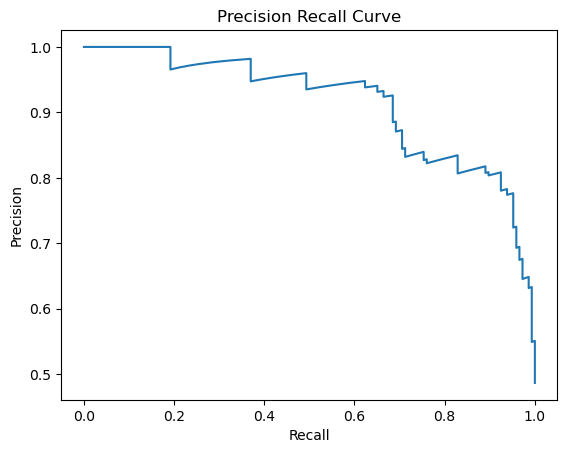

In [79]:
# precisionとrecallのトレードオフのカーブ
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
%matplotlib inline

#positiveの確率だけ欲しいので[:, 1]
pos_prob = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, pos_prob)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

89th threshold(=0.44) is highest f1 score =0.86


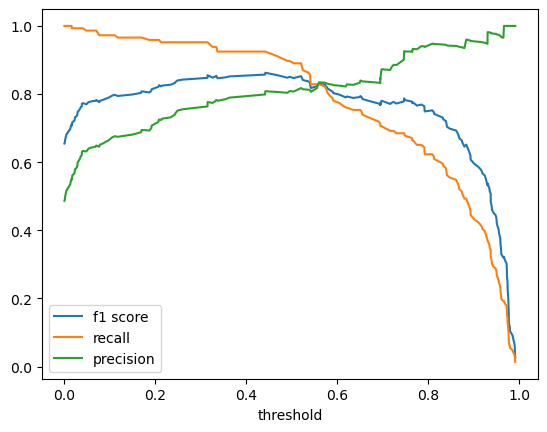

In [84]:
#F値
import numpy as np
from scipy.stats import hmean

f1_scores=[]
for p, r in zip(precision, recall):
    f1 = hmean([p, r])
    f1_scores.append(f1)

plt.plot(thresholds, f1_score[:-1], label='f1 score')
plt.plot(thresholds, recall[:-1],  label='recall')
plt.plot(thresholds, precision[:-1], label='precision')
plt.xlabel('threshold')
plt.legend()
print(f'{np.argmax(f1_scores)}th threshold(={thresholds[np.argmax(f1_scores)]:.2f}) is highest f1 score ={np.max(f1_scores):.2f}')

## ROCとAUCを超わかりやすく解説

Text(0.5, 1.0, 'ROC Curve')

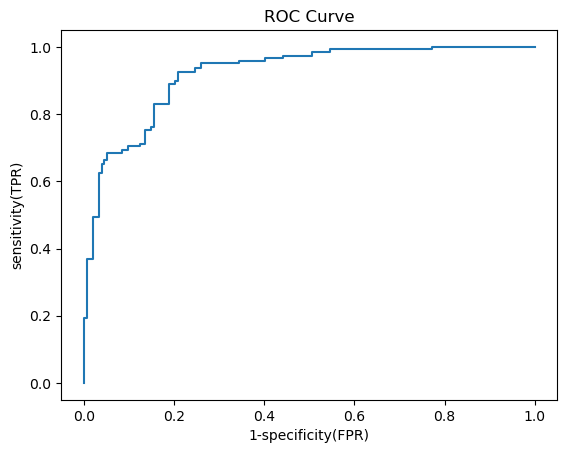

In [106]:
from sklearn.metrics import roc_curve

pos_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pos_prob)

plt.plot(fpr, tpr)
plt.xlabel('1-specificity(FPR)')
plt.ylabel('sensitivity(TPR)')
plt.title('ROC Curve')

In [108]:
#AUCの計算
from sklearn.metrics import auc
auc(fpr, tpr)

0.9196762141967622

## 多クラス分類におけるROCとAUC

In [118]:
df = sns.load_dataset('iris')
X = df.loc[:, df.columns != 'species']
y = df['species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)
pred_y = model.predict_proba(X_test)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [122]:
# y_testをone-hotコーディング(ダミー変数ではない)
from sklearn.preprocessing import label_binarize
y_test_one_hot = label_binarize(y_test, classes=model.classes_)
y_test_one_hot[:5]

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [136]:
from sklearn.metrics import roc_curve, auc
n_classes = 3
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

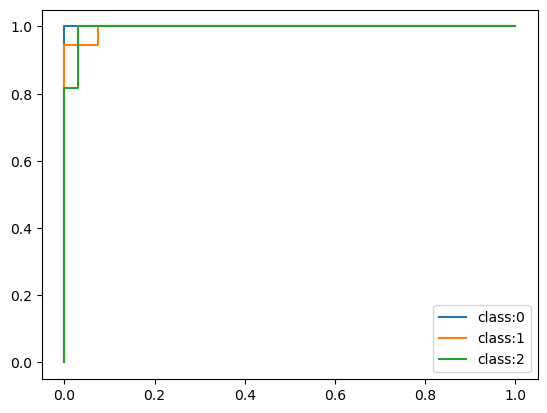

In [139]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class:{i}')
plt.legend()

In [143]:
tpr

{0: array([0.    , 0.0625, 1.    , 1.    ]),
 1: array([0.        , 0.05555556, 0.94444444, 0.94444444, 1.        ,
        1.        ]),
 2: array([0.        , 0.09090909, 0.81818182, 0.81818182, 1.        ,
        1.        ])}

In [144]:
fpr

{0: array([0., 0., 0., 1.]),
 1: array([0.        , 0.        , 0.        , 0.07407407, 0.07407407,
        1.        ]),
 2: array([0.        , 0.        , 0.        , 0.02941176, 0.02941176,
        1.        ])}

In [152]:
# fprの変化した値を抽出
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [150]:
#線形補完 (例)
all_x = np.arange(7)
data_x = [0, 2, 5, 6]
data_y = [0, 2, 4, 6]
np.interp(all_x, data_x, data_y)

array([0.        , 1.        , 2.        , 2.66666667, 3.33333333,
       4.        , 6.        ])

In [180]:
#place holderを作成
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i]) #すべてのクラス(3つ)の補完データが足し合わされる
mean_tpr = mean_tpr / len(model.classes_) #クラス数で割り、平均を出す
mean_tpr

array([0.92087542, 0.98148148, 1.        , 1.        ])

In [156]:
mean_tpr

array([2.76262626, 2.94444444, 3.        , 3.        ])

In [159]:
all_fpr

array([0.        , 0.02941176, 0.07407407, 1.        ])

0.9981505321919265


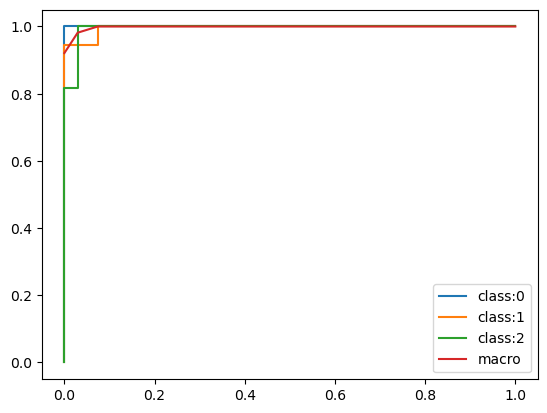

In [187]:
#auc用の要素追加
fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class:{i}')
plt.plot(fpr['macro'], tpr['macro'], label='macro')
plt.legend()
print(roc_auc['macro'])

In [189]:
#micro平均

#.ravel()で一次元
fpr['micro'], tpr['micro'], _ = roc_curve(y_test_one_hot.ravel(), y_pred_proba.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

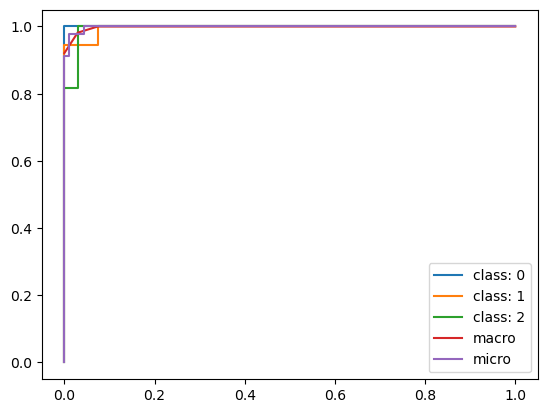

In [191]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class: {i}')
plt.plot(fpr['macro'], tpr['macro'], label='macro')
plt.plot(fpr['micro'], tpr['micro'], label='micro')
plt.legend()